In [56]:
from google.colab import files

In [57]:
uploaded = files.upload()



Saving dataset_falcon9.csv to dataset_falcon9 (1).csv


# Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Function for Plt

In [59]:
def plot_confusion_matrix(y,y_predict):
  "this function plots the confusion matrix"
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y, y_predict)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); # annot=True to annotate cells
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'land'])

In [60]:
data = pd.read_csv('dataset_falcon9.csv')

In [61]:
data.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [62]:
data = data.drop(['FlightNumber','Date','BoosterVersion','Longitude','Latitude'],axis=1)

In [63]:
data=pd.get_dummies(data)

In [64]:
data['Legs']= data['Legs'].astype(int)

In [65]:
data['Reused']= data['Reused'].astype(int)

In [66]:
data['GridFins'] = data['GridFins'].astype(int)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [68]:
x = data.drop(['Class'],axis=1)

In [69]:
y = data['Class']

# Standardize in Scikit Learn

In [70]:
transform = preprocessing.StandardScaler()

In [71]:
x_scaled = transform.fit_transform(x)

In [72]:
x_scaled

array([[-1.94814463e-16, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.19523159e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.16267307e+00, -6.53912840e-01, -1.87082869e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.99100483e+00,  3.49060516e+00,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.99100483e+00,  1.00389436e+00,  5.34522484e-01, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [-5.19213966e-01, -6.53912840e-01,  5.34522484e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [73]:
 col = x.columns

In [74]:
x = pd.DataFrame(x_scaled, columns=col)

In [75]:
x

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


# Train - Test Split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# Logistic Regresion

In [77]:
lr = LogisticRegression()

In [78]:
parameters = {"C":[0.01, 0.1,1],"penalty":['l2'],"solver":['lbfgs']}

In [79]:
logreg_cv = GridSearchCV(lr,parameters, cv=4)

In [80]:
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [81]:
print("tuned hyperparameters :(best parameters)", logreg_cv.best_params_)
print("accuracy", logreg_cv.best_score_)

tuned hyperparameters :(best parameters) {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy 0.875


# Creat List for Collecting Results

In [82]:
accu = []
methods = []
accu.append(logreg_cv.score(x_test, y_test))
methods.append('Logistic Regression')
logreg_cv.score(x_test,y_test)

0.8888888888888888

# Confusion Matrix

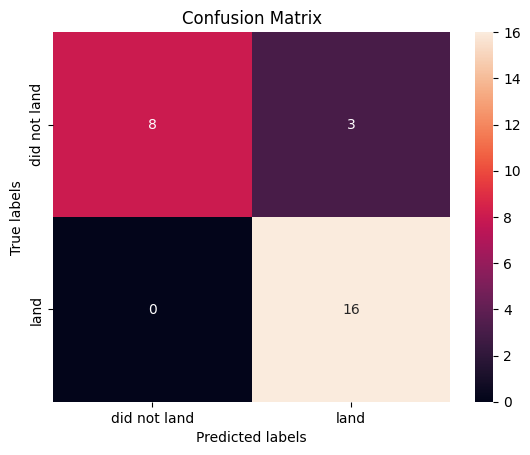

In [83]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

# Support Vector Machine

In [84]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'rbf', 'sigmoid'), 'C':(0.5, 1, 1.5)}

In [85]:
svm = SVC()

In [86]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [87]:
print("tuned hyperparameters :(best parameters)", svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters) {'C': 1, 'kernel': 'sigmoid'}
accuracy : 0.9380952380952381


In [88]:
accu.append(svm_cv.score(x_test,y_test))
methods.append('Support Vector Machine')
svm_cv.score(x_test, y_test)

0.8888888888888888

# Confusion Matrix

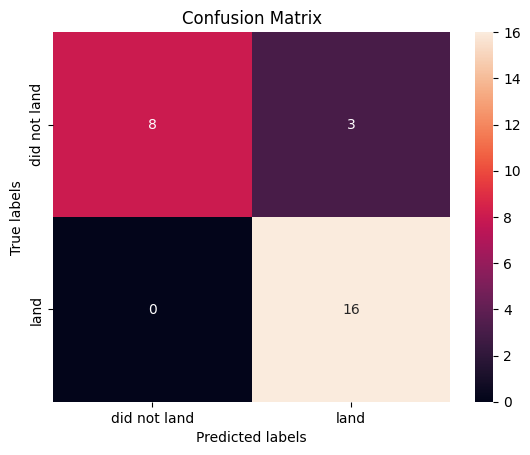

In [89]:
yhat = svm_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

# Decision Tree

In [90]:
parameters = {'criterion':['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10]}

tree = DecisionTreeClassifier()

In [91]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [92]:
tree_cv.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [93]:
print("tuned hyperparameters :(best parameters)", tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters) {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9666666666666668


In [94]:
accu.append(tree_cv.score(x_test,y_test))
methods.append('Decision Tree')
tree_cv.score(x_test, y_test)

0.8888888888888888

# Confusion Matrix

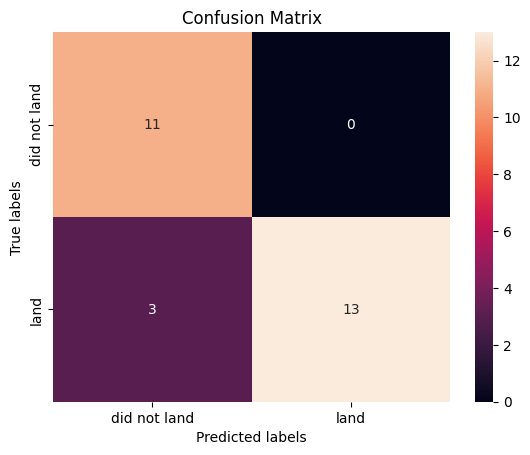

In [97]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)


# K Nearest Neighbor

In [99]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2,]}


In [100]:
knn = KNeighborsClassifier()

In [101]:
knn_cv = GridSearchCV(knn, parameters, cv = 10)

In [102]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [104]:
print("tuned hyperparameters :(best parameters)", knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters) {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8928571428571429


In [105]:
accu.append(knn_cv.score(x_test,y_test))
methods.append('K Nearest Neighbor')
knn_cv.score(x_test, y_test)

0.8148148148148148

# Confusion Matrix

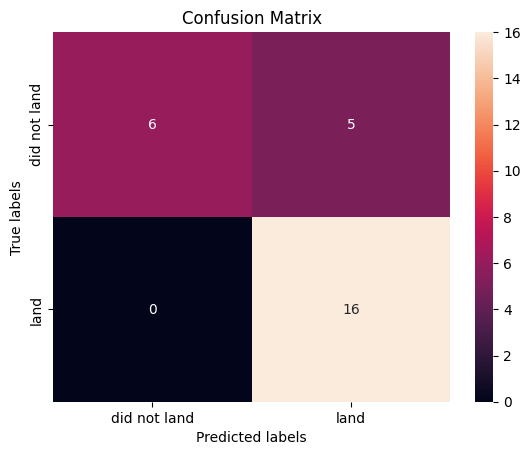

In [107]:
yhat = knn_cv.predict(x_test)
plot_confusion_matrix(y_test, yhat)

The Best Performed Model

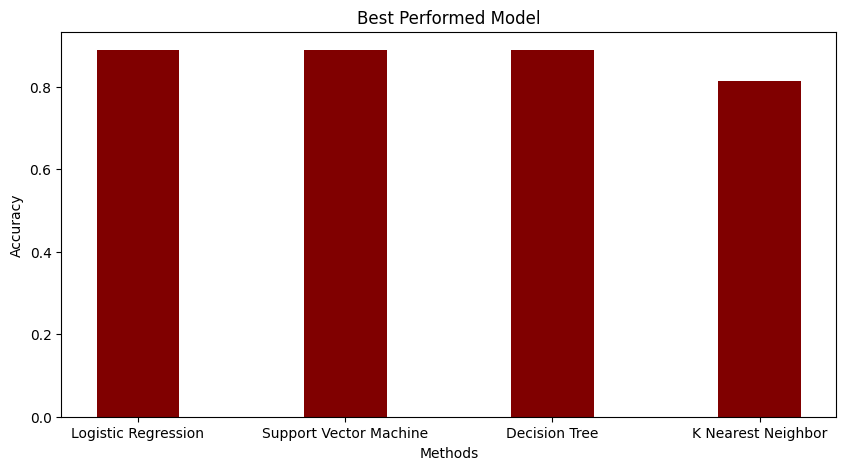

In [109]:
fig = plt.figure(figsize = (10, 5))

#creatin the bar plot
plt.bar(methods, accu, color = 'maroon', width= 0.4)

plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Performed Model')
plt.show()